In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
df.shape

(215, 13)

In [4]:
nv = df.isnull().sum()
nv = nv[nv>0]
print(nv)

Series([], dtype: int64)


In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [7]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [8]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print('num_cols:\n',num_cols)
print('cat_cols:\n',cat_cols)

num_cols:
 Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')
cat_cols:
 Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')


In [9]:
for i in num_cols:
    print(f'Features {i}')
    print(df[i].nunique())
    print('*'*30)

Features ssc_percentage
103
******************************
Features hsc_percentage
97
******************************
Features degree_percentage
89
******************************
Features emp_test_percentage
100
******************************
Features mba_percent
205
******************************


### EDA

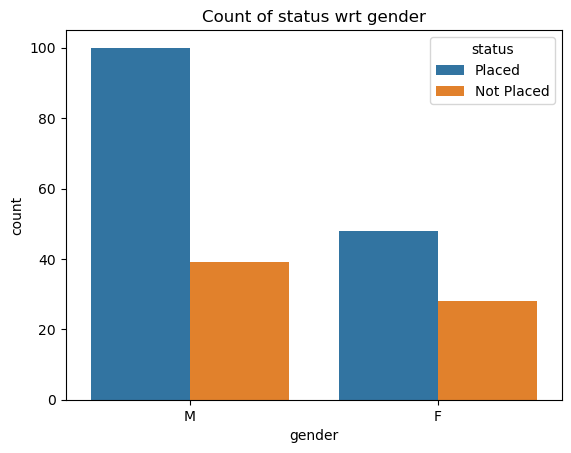

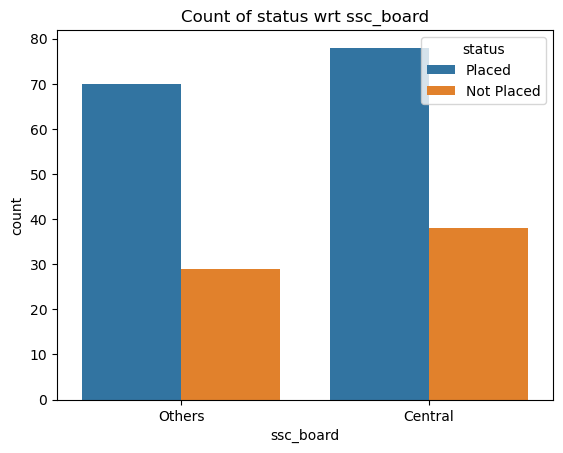

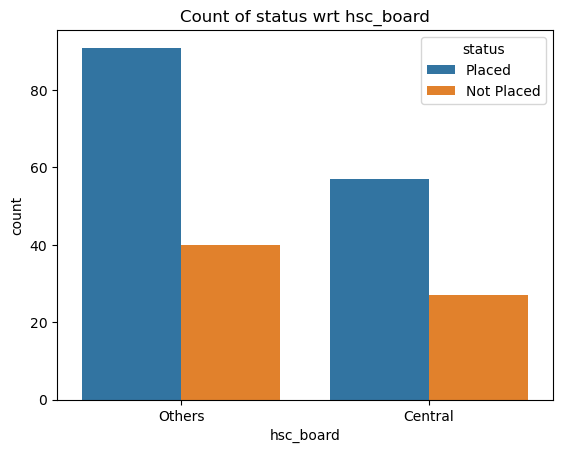

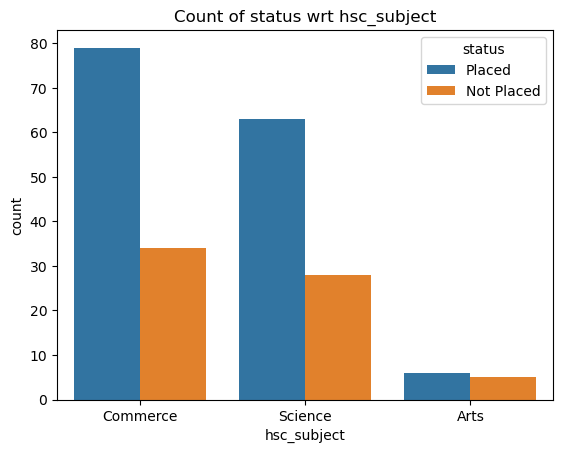

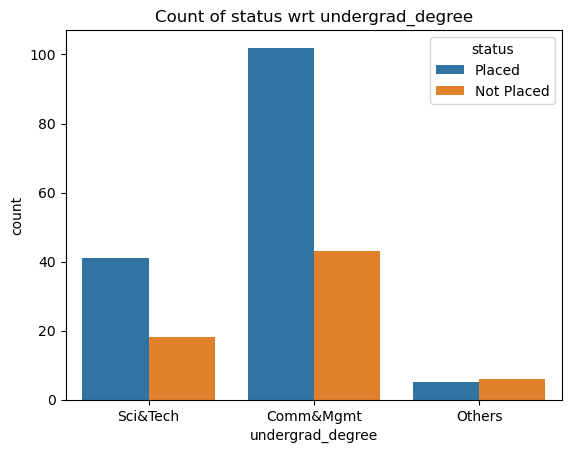

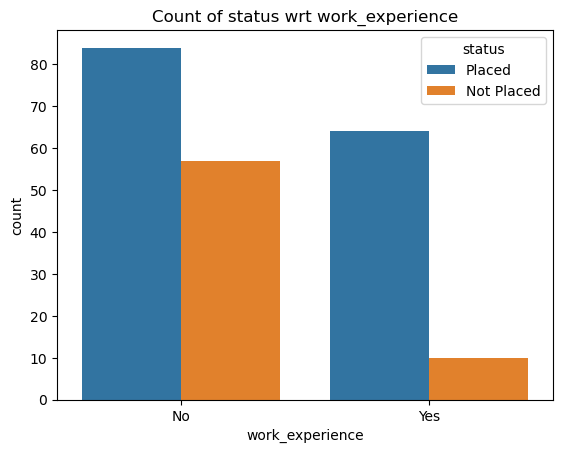

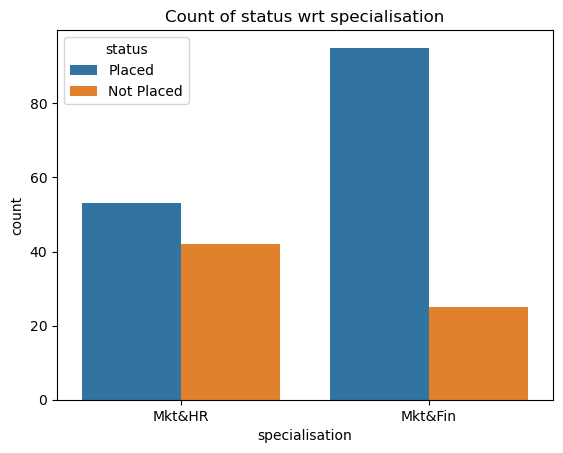

In [10]:
for i in cat_cols[:-1]:
    sns.countplot(x=df[i], hue=df['status'])
    plt.title(f'Count of status wrt {i}')
    plt.show()

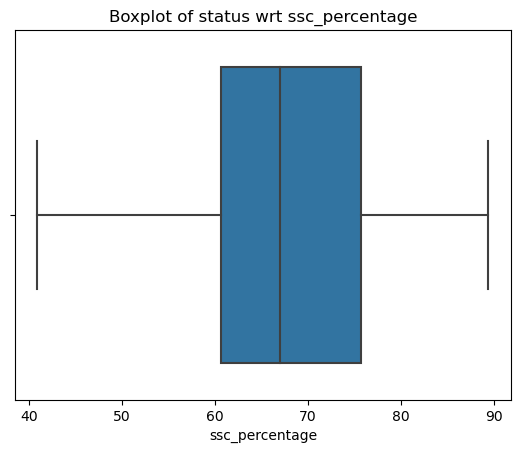

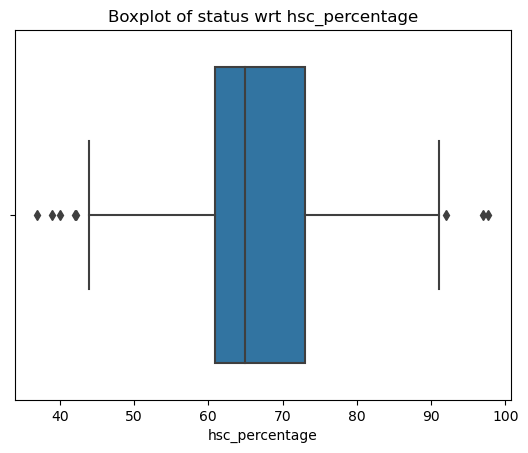

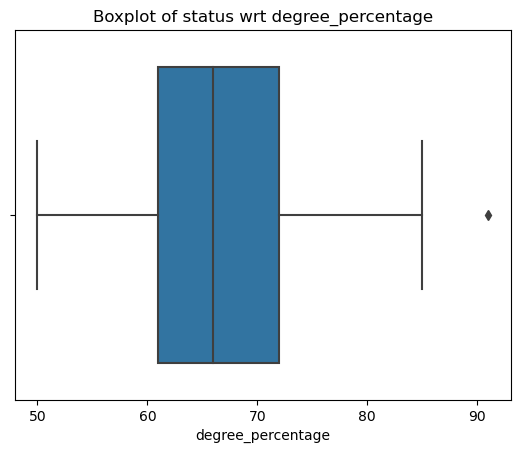

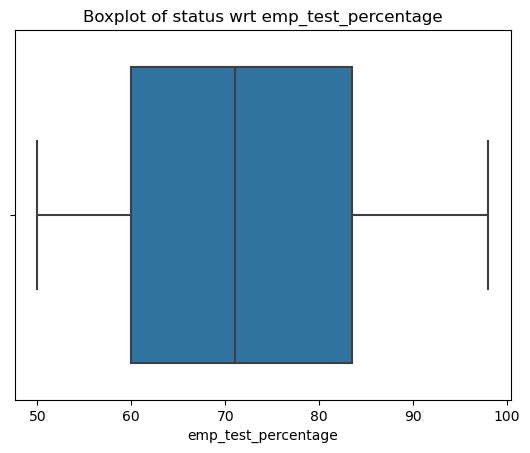

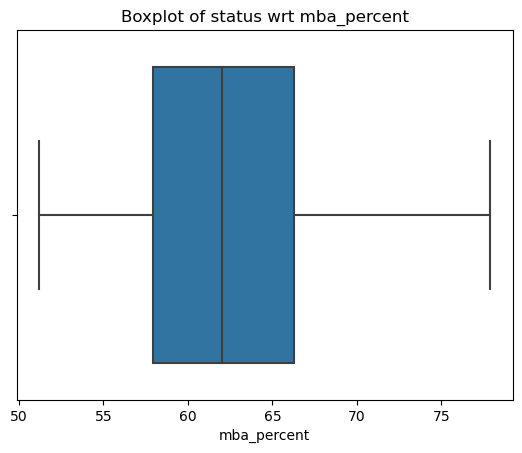

In [11]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of status wrt {i}')
    plt.show()

In [12]:
#### Outlier Treatment
#### Encoding Categorical Columns

In [13]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

### Selecting independent and dependent features

In [14]:
x = df.drop('status',axis=1)
y = df['status']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(215, 12)
(215,)


### Split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 12)
(54, 12)
(161,)
(54,)


### Import ML models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
def eval_model(y_test,ypred):
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

### ML model w Pipeline

In [21]:
print(df.columns)
print(cat_cols) # [0,2,4,5,7,8,10] index of columns that need encoding
# [3] - column that needs outlier treatment

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')
Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')


#### Logistic Regression

In [22]:
step1 = ColumnTransformer(transformers=
                         [('enc_col', OneHotEncoder(drop='first',sparse=False),[0,2,4,5,7,8,10]),
                         ('robust_scale',RobustScaler(),[3])],
                         remainder='passthrough')

step2 = LogisticRegression(max_iter=1000)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

[[ 9  5]
 [ 3 37]]
              precision    recall  f1-score   support

  Not Placed       0.75      0.64      0.69        14
      Placed       0.88      0.93      0.90        40

    accuracy                           0.85        54
   macro avg       0.82      0.78      0.80        54
weighted avg       0.85      0.85      0.85        54



#### KNN

In [23]:
# step1 remains the same

step2 = KNeighborsClassifier(n_neighbors=11)

pipe_knn = Pipeline([('step1',step1),('step2',step2)])

pipe_knn.fit(x_train,y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model(y_test,ypred_knn)

[[ 6  8]
 [ 3 37]]
              precision    recall  f1-score   support

  Not Placed       0.67      0.43      0.52        14
      Placed       0.82      0.93      0.87        40

    accuracy                           0.80        54
   macro avg       0.74      0.68      0.70        54
weighted avg       0.78      0.80      0.78        54



/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Saving the model

In [24]:
import pickle

In [25]:
pickle.dump(pipe_lr, open('lr1.pkl','wb')) # saving the best performing model
pickle.dump(df, open('df1.pkl','wb'))       # saving the dataframe